In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
### Handling missing values

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

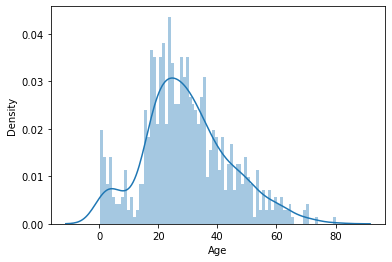

In [5]:
sns.distplot(df.Age,bins=80)

In [6]:
data=df.copy()

In [7]:
data['Age']=np.where(df['Age']>0,0,1)

In [8]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,1,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0,1,0,237736,30.0708,NaN,C


<AxesSubplot:xlabel='Survived'>

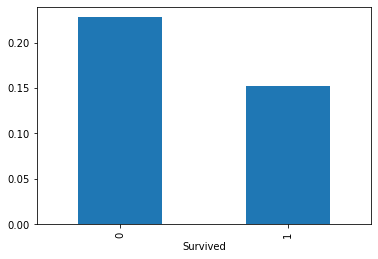

In [9]:
data['Age'].groupby(data['Survived']).mean().plot.bar()

In [10]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [11]:
df.loc[df['Age'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [12]:
#### Random sample imputation methods to fill nan values

In [13]:
df['Age_1'] = df.Age
rand = df['Age_1'].dropna().sample(df['Age_1'].isnull().sum(),random_state=0)
rand.index = df[df['Age'].isnull()].index
df.loc[df['Age'].isnull(),'Age_1'] = rand
df.drop('Age',axis=1,inplace=True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_1
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


<AxesSubplot:xlabel='Pclass'>

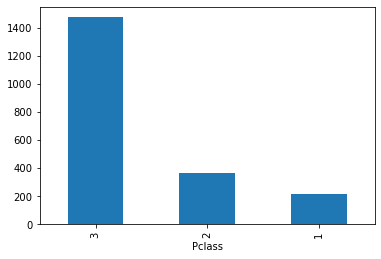

In [15]:
df.groupby(df['Pclass'])['Pclass'].sum().sort_values(ascending=False).plot.bar()

In [16]:
df["Cabin"].fillna('Miss',inplace=True)

In [17]:
df['Cabin']

0      Miss
1       C85
2      Miss
3      C123
4      Miss
       ... 
886    Miss
887     B42
888    Miss
889    C148
890    Miss
Name: Cabin, Length: 891, dtype: object

In [18]:
def func(x):
    for c in x:
        return c[0]

In [19]:
df['Cabin']=df['Cabin'].map(func)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_1
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,M,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,M,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,M,S,35.0


In [21]:
# adding importance to nan values 

df['Cabin_nan']=np.where(df["Cabin"]=='M',1,0)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_1,Cabin_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,M,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,C,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,M,S,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C,S,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,M,S,35.0,1


In [23]:
#filling nan values with most frequent value

df.Embarked.fillna(df.Embarked.mode())

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [24]:
### Data prepossessing

In [25]:
df.Sex=np.where(df.Sex == 'male',1,0)

In [26]:
df.groupby(df['Sex'])['Sex'].count()

Sex
0    314
1    577
Name: Sex, dtype: int64

In [27]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [29]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_1,Cabin_nan
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,M,2,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,M,2,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C,2,35.0,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,M,2,35.0,1


In [30]:
# Creating dummy variable and droping one columns
data=df.copy()
dummy=pd.get_dummies(data['Cabin'],prefix='Cabin_')
df1=data.join(dummy)


In [31]:
df1.drop('Cabin__M',axis=1,inplace=True)

In [32]:
df1['Alone']=df1['SibSp'] + df1['Parch']

In [33]:
df1['Alone'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

In [34]:
df1['Alone']=np.where(df1['Alone']==0,1,0)

In [35]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_nan,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,M,...,1,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,M,...,1,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C,...,0,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,M,...,1,0,0,0,0,0,0,0,0,1


In [36]:
### Outlier

Text(0.5, 1.0, 'Distribution of Age')

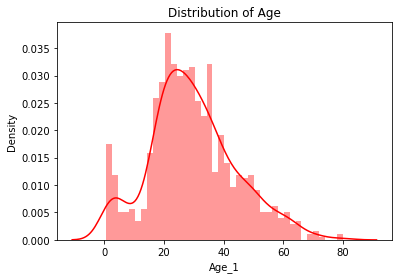

In [37]:
sns.distplot(df1["Age_1"],bins=40,color='r')
plt.title('Distribution of Age')

<AxesSubplot:xlabel='Age_1'>

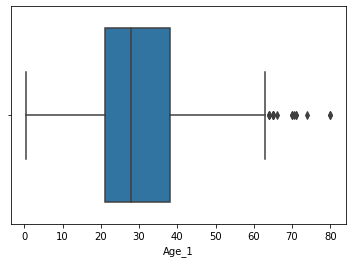

In [38]:
sns.boxplot(df1['Age_1'])

In [39]:
df1.Age_1.sort_values(ascending=True).unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ])

In [40]:
#Main dataframe for modeling
main=df1.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)

In [41]:
main.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_1,Cabin_nan,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Alone
0,0,3,1,1,0,2,22.0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,38.0,0,0,0,1,0,0,0,0,0,0
2,1,3,0,0,0,2,26.0,1,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,2,35.0,0,0,0,1,0,0,0,0,0,0
4,0,3,1,0,0,2,35.0,1,0,0,0,0,0,0,0,0,1


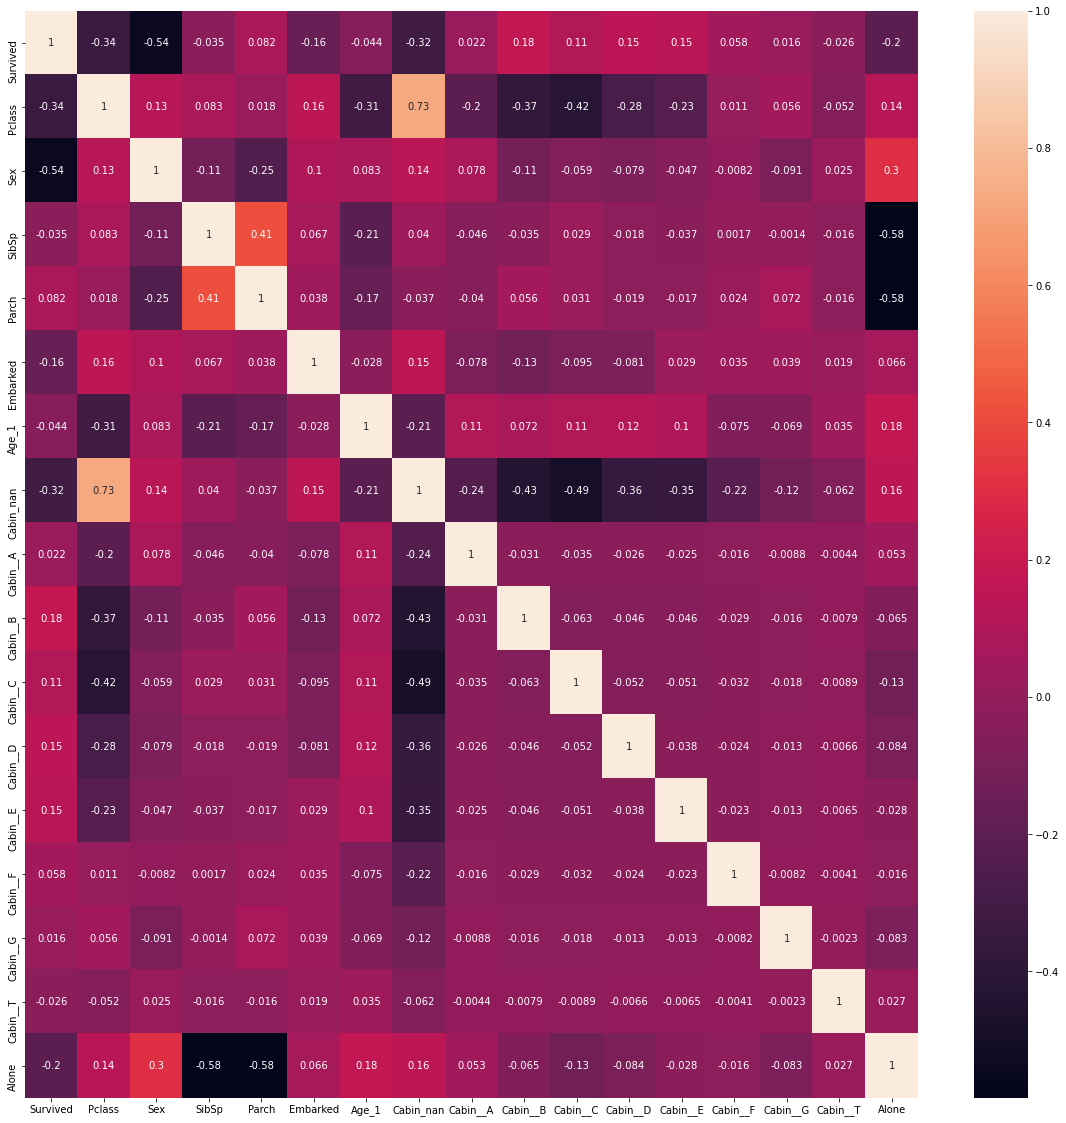

In [42]:
#correlation
corr=main.corr()
plt.figure(figsize=(20,20))
ax=sns.heatmap(corr,annot=True)

In [43]:
#features
X=main.drop('Survived',axis=1)

#Target 
y=main.Survived

In [44]:
# TRAIN AND TEST 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [45]:
y_train

466    0
434    0
277    0
567    0
392    0
      ..
779    1
341    1
84     1
687    0
813    0
Name: Survived, Length: 623, dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [47]:
model.fit(X_train,y_train)

LogisticRegression()

In [48]:
model.score(X_test,y_test)

0.7910447761194029

In [49]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)

In [50]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [51]:
model.score(X_test,y_test)

0.7686567164179104

In [52]:
from sklearn.svm import SVC
model=SVC(C=10)

In [53]:
model.fit(X_train,y_train)

SVC(C=10)

In [54]:
model.score(X_test,y_test)

0.7835820895522388

In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model.predict(X_test))

<AxesSubplot:>

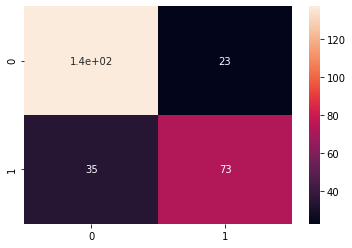

In [60]:
sns.heatmap(cm,annot=True)

In [62]:
from sklearn.ensemble import AdaBoostClassifier
model_ada=AdaBoostClassifier()

In [64]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier()

In [65]:
model.score(X_test,y_test)

0.7835820895522388

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb=GradientBoostingClassifier(learning_rate=0.3)

In [85]:
model_gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.3)

In [86]:
model_gb.score(X_test,y_test)

0.8395522388059702